<a href="https://colab.research.google.com/github/AishaKanwal/OasisInfobyte-DataScienceInternship/blob/main/Task1_IrisSpeciePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Oasis Infobyte - Data Science Internship**
> **Task 1 - Iris Flowers Classification ML Model**

> **Aisha Kanwal | Internee**


# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Adding column names for the dataset

In [ ]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df.columns = columns
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
rows, cols = df.shape
print("Number of rows", rows)
print("Number of columns", cols)

Number of rows 149
Number of columns 5


# Missing Values

In [ ]:
# percentage calculation of missing values
df.isnull().sum() / df.shape[0] * 100

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64



```
There isn't any missing value in iris dataset
```



# Statistics

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  149 non-null    float64
 3   PetalWidthCm   149 non-null    float64
 4   Species        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Visualization

<ipython-input-8-1fb069134b69>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SepalLengthCm'], shade=True, color="b", linewidth=2)


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

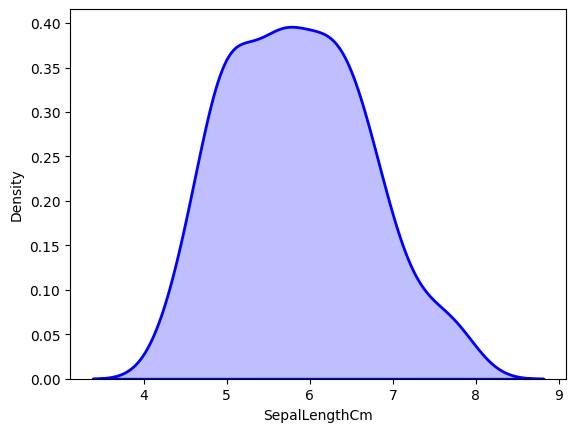

In [ ]:
#kde plot to check the data normalization
sns.kdeplot(df['SepalLengthCm'], shade=True, color="b", linewidth=2)

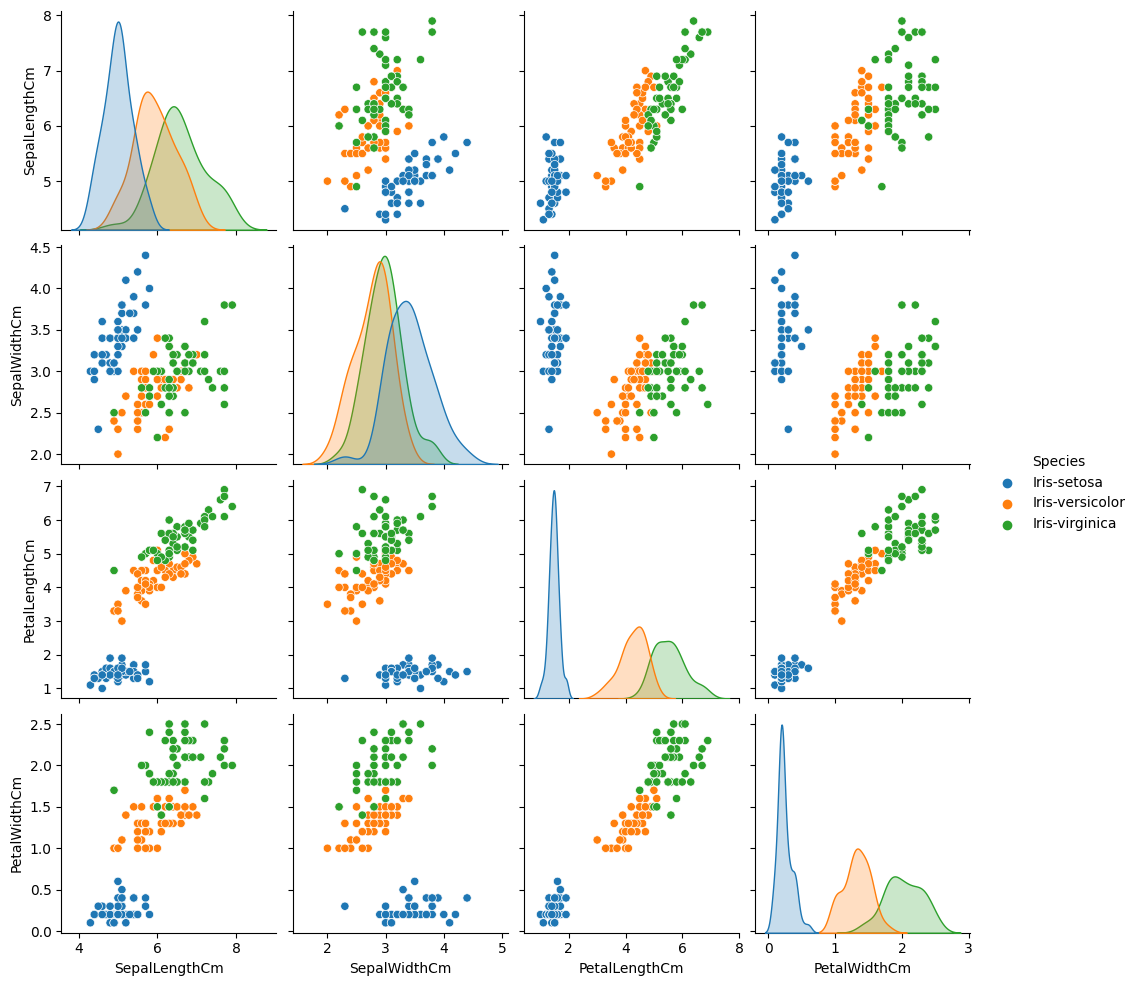

In [ ]:
sns.pairplot(df, hue='Species')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

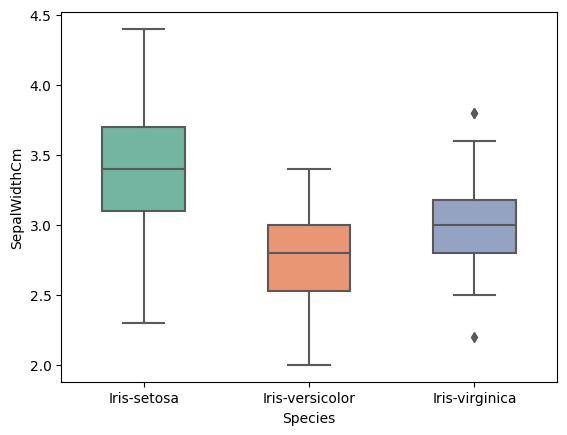

In [ ]:
sns.boxplot(x='Species', y='SepalWidthCm', data=df, width=0.5, palette='Set2')

# Correlation

In [ ]:
corr = df.corr(method='pearson')
corr

<ipython-input-12-fd1764de5e1e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.103784,0.871283,0.816971
SepalWidthCm,-0.103784,1.000000,-0.415218,-0.350733
PetalLengthCm,0.871283,-0.415218,1.000000,0.962314
PetalWidthCm,0.816971,-0.350733,0.962314,1.000000


<Axes: >

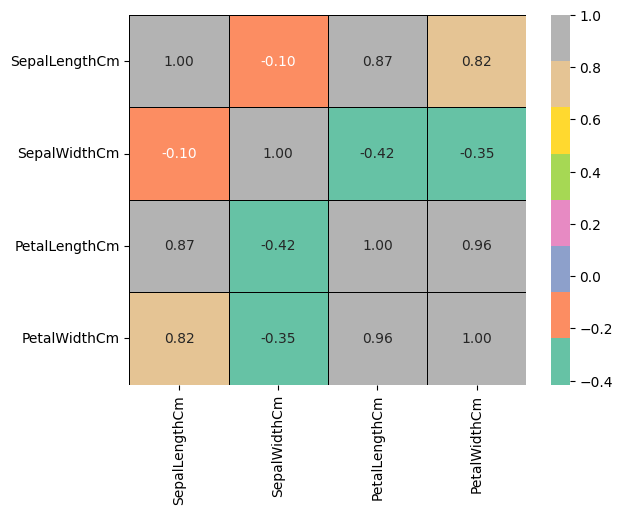

In [ ]:
sns.heatmap(corr, annot=True, linewidth=0.5, linecolor='black', fmt='.2f', cmap='Set2')

# ML Prediction Model

## Defining X and y for the model

In [ ]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

## Split dataset into test and train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Splitted dataset shape

In [ ]:
print("X_train:",X_train.shape, "X_test:",X_test.shape) 
print("Y_train:",y_train.shape, "Y_test:",y_test.shape)

X_train: (119, 4) X_test: (30, 4)
Y_train: (119,) Y_test: (30,)


## Fit the model

In [ ]:
model = []
model.append(('SVC', SVC(gamma='auto')))

In [ ]:
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

## Predict the model

In [ ]:
pred =model.predict(X_test)

## Accuracy Score

In [ ]:
print ("Accuracy Score: ", accuracy_score(y_test, pred))
print ("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.9333333333333333
Classification Report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



# User-Friendly ML Model (SVC)

## Scale the features

In [ ]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Get input from user, process data and predict the specie

In [ ]:
input_data = []
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))
input_data.append([sepal_length, sepal_width, petal_length, petal_width])

# Preprocess input data
input_data = scaler.transform(input_data)

# Predict the class
predicted_specie = model.predict(input_data)

print("Predicted Specie is: ", predicted_specie[0])

Enter sepal length (cm): 0.2
Enter sepal width (cm): 0.4
Enter petal length (cm): 0.5
Enter petal width (cm): 0.5
Predicted Specie is:  Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Task 1 - Iris Flowers Classification ML Model
**Done by Aisha Kanwal**